# Numerical Methods
___
Adding some tools to our toolbox

The aim of this unit will be to help us understand how we go from thinking about things fully theoretically, to making them numeric.

* In this way we'll lose some generality, as we won't be able to think about things abstractly
* But we'll also gain a whole bunch of concrete detail

In general, as part of my process, I tend to always start out with fully analytical models:
* This is where you figure out the moving parts
* What are inputs/outputs
* What's the objective here, etc

But at some point the model either gets too complicated to solve, or I'm trying to move the model to data to estimate things concretely, at which point we move from having a theoretical model on a piece of paper, to trying to get this model to engage with numbers.

Today we'll go through ways to mirror some of the analysis skills we've used in the theory sections, but within the computer.

Our aims is to go over three key numerical tools:
1. Numerical derivatives
2. Numerical solutions to equations
3. Numerical Optimization (next notebook)

In [21]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import utils  # Our shared utility module

# Set up plotting style
utils.set_pitt_style()

# Define Pitt colors for plotting
PITT_BLUE = utils.PITT_BLUE
PITT_GOLD = utils.PITT_GOLD
PITT_GRAY = utils.PITT_GRAY

## Linear Equations

Suppose that we have a simple system of equations:
$$ \begin{array}{rcl} 2 x_1+ 3 x_2 & = & 6 \\  x_1+ x_2 & = & 2 \end{array}$$

You probably solved this type of equation in high school, and the unique solution is:
$$ \begin{array}{rcl} x_1 & = & 0 \\  x_2 & = & 2 \end{array}$$

We can represent this as a linear system:
$$\begin{array}{rcl} 2 x_1+ 3 x_2 & = & 6 \\  x_1+ x_2 & = & 2 \end{array} \Rightarrow \left[ \begin{array}{cc}
 2 & 3 \\ 
 1 & 1 \end{array}\right] 
 \left(\begin{array}{c}x_1\\x_2\end{array}\right)= \left(\begin{array}{c}6\\2\end{array}\right)
 $$
 
So the linear equation system is $\mathbf{A}\mathbf{x}=\mathbf{c}$

In [2]:
# Use numpy arrays
A = np.array([[2, 3], 
              [1, 1]])

c = np.array([6, 2])

# Solve using np.linalg.solve (more numerically stable than using inverse)
x = np.linalg.solve(A, c)
print("Solution:")
print(f"x1 = {x[0]}")
print(f"x2 = {x[1]}")

Solution:
x1 = 0.0
x2 = 2.0


In [3]:
# Alternatively, using matrix inverse
A_inv = np.linalg.inv(A)
x_via_inv = A_inv @ c  # @ is matrix multiplication in Python
print("Via inverse:")
print(x_via_inv)

Via inverse:
[0. 2.]


While this example we could have done more quickly by hand, once the number of equations becomes large, linear algebra becomes very useful.

Implicitly, you've been using the benefits of this when minimizing the total sum of squares for a regression model:
$$ \sum_i\left(y_{i}-(\beta_0+\beta_1 x_{i,1}+\ldots +\beta_k x_{i,k})\right)^2 $$

The OLS solution is:
$$ \hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} $$

# Numerical Derivatives

## Analytical Derivatives

### Easy Ones
Sometimes it is trivial for us to take a derivative:
$$ f(x)=a x^2+b x+c \quad \Rightarrow \quad f^\prime(x)=2 a x+b $$

### Medium Ones
Other times, we can probably solve something, it just takes us a bit longer:
$$ g(x)=(a x^2+b x+c)\cdot e^{-\lambda x}$$
$$ f^\prime(x)=-\lambda e^{-\lambda x}(a x^2 +bx +c)+e^{-\lambda x}(2ax+b)$$

### Hurt-Your-Head Ones
And still other times, it's just not worth really thinking about the analytical formula...

## Gradients & Derivatives

### Discrete changes
A lot of the time when we're thinking about changes, it's usually a discrete quantity change:
$$x\mapsto x+\Delta x$$ 

The underlying gradient is the ratio of the movements:
$$ \frac{\Delta y}{\Delta x}=\frac{f(x+\Delta x)-f(x)}{\Delta x} $$

### Derivatives
As we make the change in $x$ smaller and smaller, this gradient approaches the derivative:
$$\tfrac{d}{dx}y= \lim_{\Delta x\rightarrow 0} \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

### Coding it up

Let's go back to our simplest example $f(x)=a x^2+b x+c$,
but where we make the problem exact by setting $a=2$, $b=-10$ and $c=3$

So:
* $f(x)=2 x^2- 10 x+3$
* $f^\prime(x)=4 x-10$

In [4]:
# Define a numerical derivative function
def num_deriv(f, x, eps):
    """Forward difference numerical derivative."""
    return (f(x + eps) - f(x)) / eps

# Define the function we're interested in taking derivatives of
def easy_f(x):
    """f(x) = 2x^2 - 10x + 3"""
    return 2*x**2 - 10*x + 3

# Define the actual (analytical) derivative
def d_easy_f(x):
    """f'(x) = 4x - 10"""
    return 4*x - 10

In [5]:
# Take Numerical Derivatives!
eps = 1e-7
nd = num_deriv(easy_f, 3, eps)
ad = d_easy_f(3)
err = nd - ad

print(f"Numerical derivative:  {nd:.10f}")
print(f"Analytical derivative: {ad:.10f}")
print(f"Error:                 {err:.2e}")

Numerical derivative:  2.0000002010
Analytical derivative: 2.0000000000
Error:                 2.01e-07


## Another Example

Let's try our medium-hard example where we'll just take the product of our previous quadratic function with an exponential function:

$$\left(2 x^2- 10 x+3 \right)e^{-x/10}$$

In [6]:
# Define the medium-hard function
def med_f(x):
    """f(x) = (2x^2 - 10x + 3) * exp(-x/10)"""
    return easy_f(x) * np.exp(-x/10)

# Analytical derivative using product rule
def d_med_f(x):
    """f'(x) = -0.1*exp(-0.1x)*(2x^2-10x+3) + exp(-0.1x)*(4x-10)"""
    return -0.1 * np.exp(-0.1*x) * easy_f(x) + np.exp(-0.1*x) * (4*x - 10)

In [7]:
# Take Numerical Derivatives!
eps = 1e-5
nd = num_deriv(med_f, 3, eps)
ad = d_med_f(3)
err = nd - ad

print(f"Numerical derivative:  {nd:.10f}")
print(f"Analytical derivative: {ad:.10f}")
print(f"Error:                 {err:.2e}")

Numerical derivative:  2.1483858413
Analytical derivative: 2.1483728400
Error:                 1.30e-05


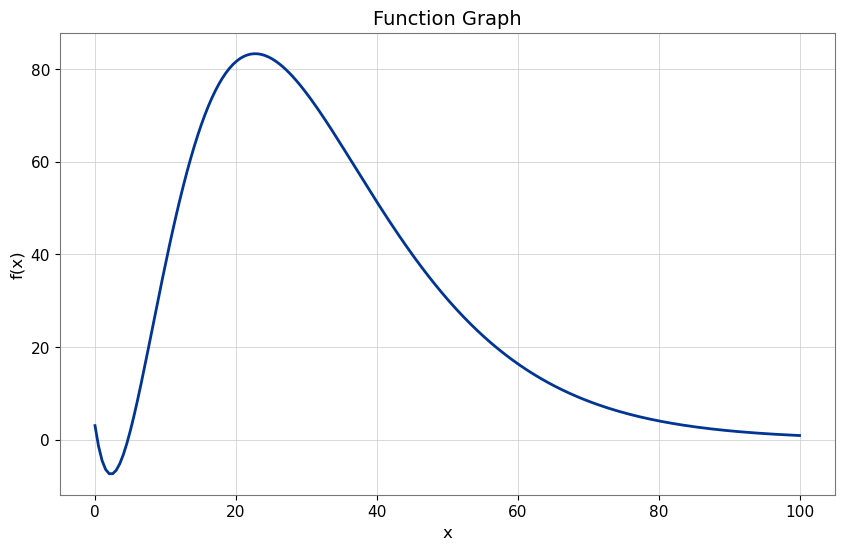

In [8]:
# Draw a graph of the function
x = np.linspace(0, 100, 200)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, med_f(x), color=PITT_BLUE, linewidth=2)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Function Graph')
plt.show()

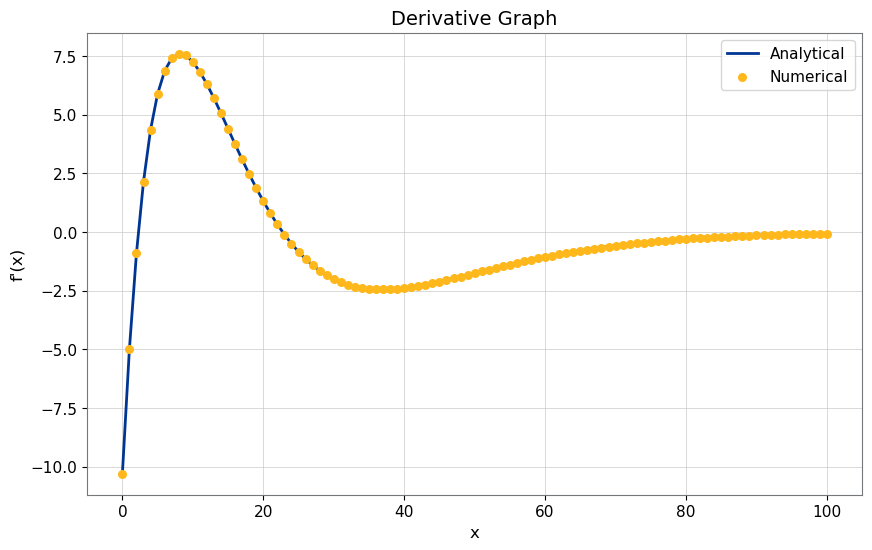

In [9]:
# Create numerical derivatives for every x from 0 to 100
x_range = np.arange(0, 101)
nd_med_f = np.array([num_deriv(med_f, xi, 1e-5) for xi in x_range])

# Draw both analytical and numerical derivatives
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_range, d_med_f(x_range), color=PITT_BLUE, linewidth=2, label='Analytical')
ax.scatter(x_range, nd_med_f, color=PITT_GOLD, s=30, zorder=5, label='Numerical')
ax.set_xlabel('x')
ax.set_ylabel("f'(x)")
ax.set_title('Derivative Graph')
ax.legend()
plt.show()

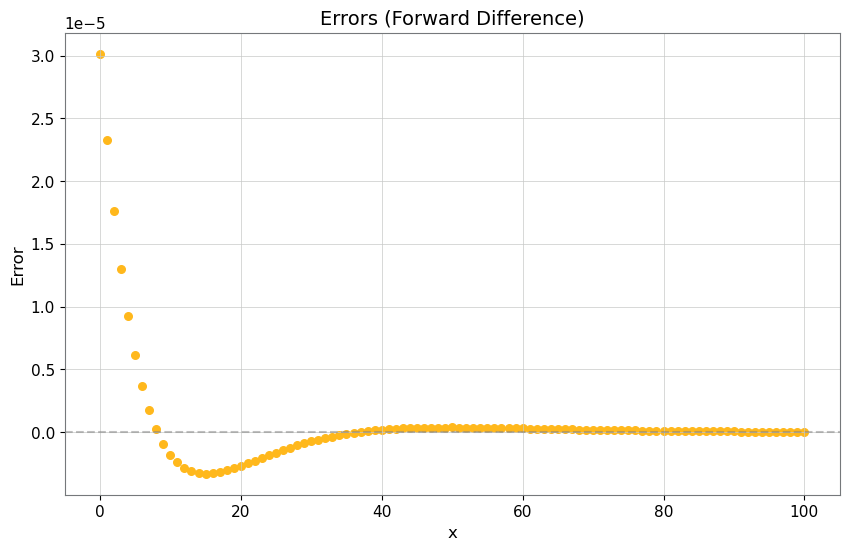

In [10]:
# Graph the errors (numerical - actual)
nd_med_f_error = nd_med_f - d_med_f(x_range)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_range, nd_med_f_error, color=PITT_GOLD, s=30)
ax.set_xlabel('x')
ax.set_ylabel('Error')
ax.set_title('Errors (Forward Difference)')
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.show()

## Taylor Expansion and Better Formulas

One way to think through this procedure is to consider the **Taylor expansion** of the function around the point $x$ for any deviation $\Delta x$:

$$f(x+\Delta x)=f(x)+\frac{f^\prime(x)}{1!}\Delta x+\frac{f^{\prime\prime}(x)}{2!}\Delta x^2+\frac{f^{\prime\prime\prime}(x)}{3!}\Delta x^3+\ldots$$

So our forward difference formula gives us:
$$\frac{f(x+\epsilon)-f(x)}{\epsilon}=f^\prime(x) + \frac{f^{\prime\prime}(x)}{2!}\epsilon + \ldots = f^\prime(x) + O(\epsilon)$$

### Centered Difference

If we use both a forward and a backward increment to generate a *centered difference* equation:
$$\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}=f^\prime(x)+O(\epsilon^2)$$

This is a more accurate approximation!

In [11]:
# Define centered numerical derivative (O(eps^2) accuracy)
def c_num_deriv(f, x, eps):
    """Centered difference numerical derivative."""
    return (f(x + eps) - f(x - eps)) / (2 * eps)

# This is also available in our utils module:
# utils.numerical_derivative(f, x, eps)

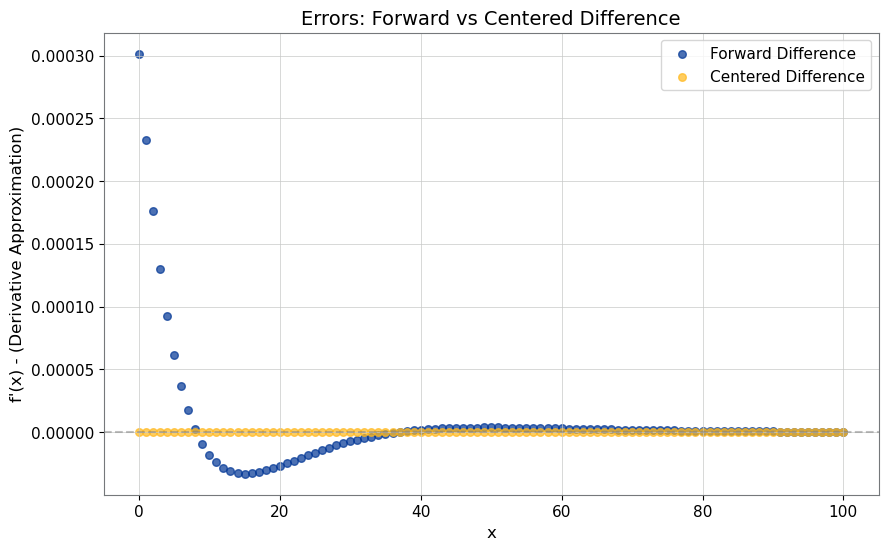

In [12]:
# Compare forward vs centered difference
eps = 1e-4
c_nd_med_f = np.array([c_num_deriv(med_f, xi, eps) for xi in x_range])
nd_med_f = np.array([num_deriv(med_f, xi, eps) for xi in x_range])

c_nd_med_f_error = c_nd_med_f - d_med_f(x_range)
nd_med_f_error = nd_med_f - d_med_f(x_range)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_range, nd_med_f_error, color=PITT_BLUE, s=30, label='Forward Difference', alpha=0.7)
ax.scatter(x_range, c_nd_med_f_error, color=PITT_GOLD, s=30, label='Centered Difference', alpha=0.7)
ax.set_xlabel('x')
ax.set_ylabel("f'(x) - (Derivative Approximation)")
ax.set_title('Errors: Forward vs Centered Difference')
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.legend()
plt.show()

## Higher-Order Formulas via Linear Algebra

Using Taylor expansion with 5 points, we can derive even more accurate formulas.

We set up the system:
$$ \mathbf{f}=\mathbf{A}\mathbf{d} $$

where $\mathbf{f}$ contains function evaluations at $x-2\epsilon, x-\epsilon, x, x+\epsilon, x+2\epsilon$, and $\mathbf{d}$ contains $D_0f = f(x)$, $D_1f = f'(x)\epsilon$, etc.

In [22]:
# Build the Taylor coefficient matrix
A = np.zeros((5, 5))
for i, offset in enumerate([-2, -1, 0, 1, 2]):
    for j in range(5):
        A[i, j] = (offset ** j) / math.factorial(j)

A = A[[4, 3, 2, 1, 0], :]

print("Taylor coefficient matrix A:")
print(A)

Taylor coefficient matrix A:
[[ 1.          2.          2.          1.33333333  0.66666667]
 [ 1.          1.          0.5         0.16666667  0.04166667]
 [ 1.          0.          0.          0.          0.        ]
 [ 1.         -1.          0.5        -0.16666667  0.04166667]
 [ 1.         -2.          2.         -1.33333333  0.66666667]]


In [23]:
# Find weights for first derivative (D_1 f)
b = np.array([0, 1, 0, 0, 0])  # Select D_1 f (the first derivative term)
A_inv = np.linalg.inv(A)
w1 = b @ A_inv

print("Weights for first derivative (O(eps^4) method):")
labels = ['f(x+2d)', 'f(x+d)', 'f(x)', 'f(x-d)', 'f(x-2d)']
for label, weight in zip(labels, w1):
    print(f"  {label}: {weight:.8f}")

Weights for first derivative (O(eps^4) method):
  f(x+2d): -0.08333333
  f(x+d): 0.66666667
  f(x): 0.00000000
  f(x-d): -0.66666667
  f(x-2d): 0.08333333


In [24]:
# Find weights for second derivative (D_2 f)
b = np.array([0, 0, 1, 0, 0])  # Select D_2 f (the second derivative term)
w2 = b @ A_inv

print("Weights for second derivative (O(eps^3) method):")
for label, weight in zip(labels, w2):
    print(f"  {label}: {weight:.8f}")

Weights for second derivative (O(eps^3) method):
  f(x+2d): -0.08333333
  f(x+d): 1.33333333
  f(x): -2.50000000
  f(x-d): 1.33333333
  f(x-2d): -0.08333333


In [25]:
# Higher-order first derivative formula (O(eps^4) accuracy)
def n_deriv_1(f, x, eps):
    """Five-point stencil first derivative (O(eps^4) accuracy)."""
    return (w1[0]*f(x+2*eps) + w1[1]*f(x+eps) + w1[2]*f(x) + 
            w1[3]*f(x-eps) + w1[4]*f(x-2*eps)) / eps

# Higher-order second derivative formula (O(eps^3) accuracy)
def n_deriv_2(f, x, eps):
    """Five-point stencil second derivative (O(eps^3) accuracy)."""
    return (w2[0]*f(x+2*eps) + w2[1]*f(x+eps) + w2[2]*f(x) + 
            w2[3]*f(x-eps) + w2[4]*f(x-2*eps)) / eps**2

# Test on easy function
print(f"n_deriv_1(med_f, 2, 1e-5) = {n_deriv_1(med_f, 2, 1e-5):.6f}")
print(f"Actual d_med_f(2) = {d_med_f(2):.6f}")
print(f"\nn_deriv_2(easy_f, 2, 1e-4) = {n_deriv_2(easy_f, 2, 1e-4):.6f}")
print(f"Actual (2nd deriv of 2x^2-10x+3 = 4)")

# Test on sin function
print(f"\nn_deriv_1(sin, 0.2, 0.001) = {n_deriv_1(np.sin, 0.2, 0.001):.6f}")
print(f"Actual cos(0.2) = {np.cos(0.2):.6f}")

n_deriv_1(med_f, 2, 1e-5) = -0.900604
Actual d_med_f(2) = -0.900604

n_deriv_2(easy_f, 2, 1e-4) = 4.000000
Actual (2nd deriv of 2x^2-10x+3 = 4)

n_deriv_1(sin, 0.2, 0.001) = 0.980067
Actual cos(0.2) = 0.980067


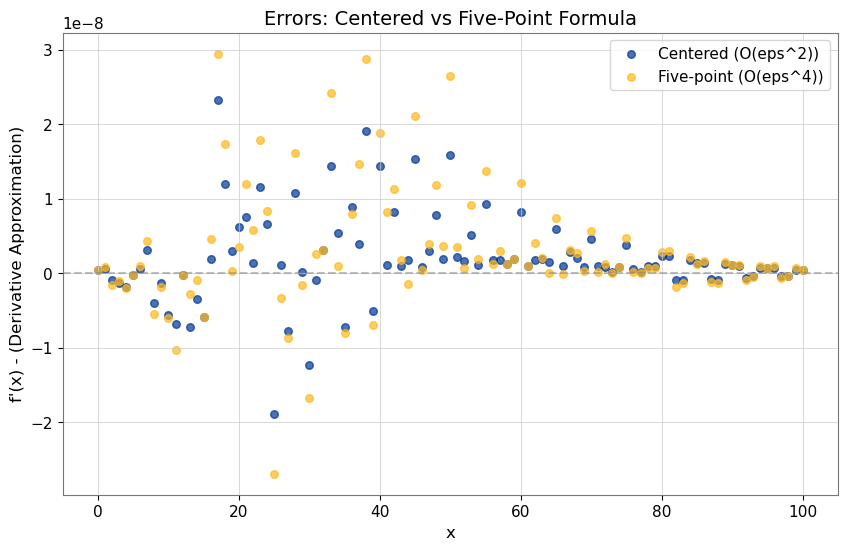

In [26]:
# Compare errors: centered vs high-order formula
high_nd_med_f = np.array([n_deriv_1(med_f, xi, 1e-6) for xi in x_range])
high_nd_med_f_error = high_nd_med_f - d_med_f(x_range)

c_nd_med_f_error = np.array([c_num_deriv(med_f, xi, 1e-6) for xi in x_range]) - d_med_f(x_range)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_range, c_nd_med_f_error, color=PITT_BLUE, s=30, label='Centered (O(eps^2))', alpha=0.7)
ax.scatter(x_range, high_nd_med_f_error, color=PITT_GOLD, s=30, label='Five-point (O(eps^4))', alpha=0.7)
ax.set_xlabel('x')
ax.set_ylabel("f'(x) - (Derivative Approximation)")
ax.set_title('Errors: Centered vs Five-Point Formula')
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.legend()
plt.show()

# Numerical Solutions to an Equation

## Non-linear Equations

Linear equations have well-defined solutions:
* We know *if* we can solve a system based on the rank of the matrix
* If it's solvable, there's a unique solution
* And we know the exact formula for this solution

Non-linear equations are tougher! Some are easily invertible:
$$ x^4= 12\Rightarrow x = 12^{1/4} $$

Others are not:
$$ x\cdot e^{x^2+3x}= 3$$

And non-linear equations can admit multiple solutions!

## Newton-Raphson Method

The core method is the Newton-Raphson iteration to find the root of a continuous function $f(x)=0$:

**Method Procedure:**
1. Guess an initial solution $x_0$
2. Figure out the value of the function at this point $f(x_0)$
3. Figure out the derivative of the function here $f^\prime(x_0)$

Then output a new guess:
$$ x_{n+1}= x_n - \dfrac{f(x_n)}{f^\prime(x_n)} $$

Stop whenever $|x_{n+1}-x_n|$ is small enough.

In [27]:
def newton_raphson(f, x0, tol=1e-8, eps=1e-6, max_iter=50):
    """
    Newton-Raphson root finding algorithm.
    
    Parameters
    ----------
    f : callable
        Function for which to find root
    x0 : float
        Initial guess
    tol : float
        Convergence tolerance
    eps : float
        Step size for numerical derivative
    max_iter : int
        Maximum iterations
        
    Returns
    -------
    float
        Approximate root
    """
    xx = x0
    fval = f(xx)
    error = abs(fval)
    ii = 1
    
    while error > tol and ii < max_iter:
        fd = n_deriv_1(f, xx, eps)  # numerical derivative
        if abs(fd) < 1e-12:
            print("Derivative too small")
            break
        xx = xx - fval / fd  # Newton-Raphson iteration
        fval = f(xx)
        error = abs(fval)
        ii += 1
    
    if ii >= max_iter:
        print("Exited due to non-convergence")
    
    print(f"{ii} steps")
    return xx

In [28]:
# Actual roots from quadratic formula for 2x^2 - 10x + 3 = 0
actual_roots = {
    'Low Root': (10 - np.sqrt(100 - 4*2*3)) / (2*2),
    'High Root': (10 + np.sqrt(100 - 4*2*3)) / (2*2)
}
print("Actual roots:")
for name, val in actual_roots.items():
    print(f"  {name}: {val:.8f}")

Actual roots:
  Low Root: 0.32055053
  High Root: 4.67944947


In [29]:
# Run Newton-Raphson starting from x0=4
print("\nStarting from x0=4:")
root = newton_raphson(easy_f, 4)
print(f"Found root: {root:.8f}")


Starting from x0=4:
5 steps
Found root: 4.67944947


In [30]:
# Starting from x0=1 (closer to the low root)
print("Starting from x0=1:")
root = newton_raphson(easy_f, 1)
print(f"Found root: {root:.8f}")

Starting from x0=1:
5 steps
Found root: 0.32055053


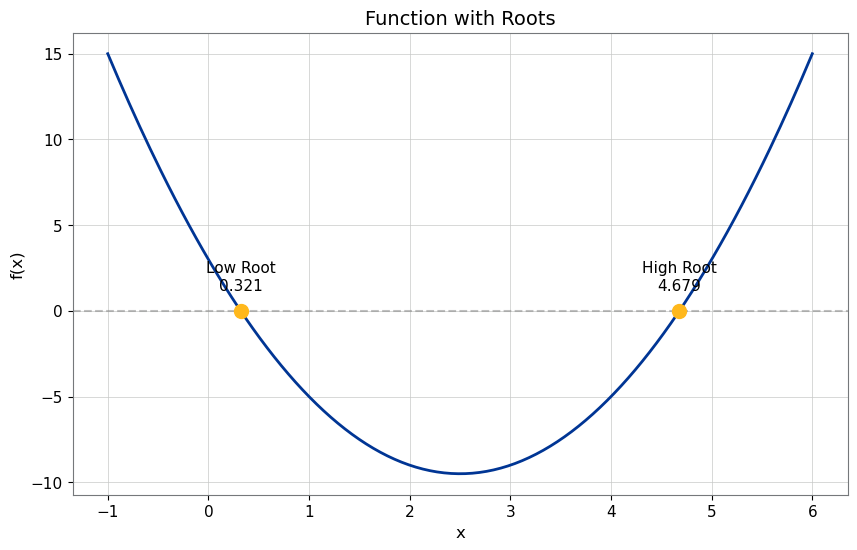

In [31]:
# Visualize the function and its roots
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(-1, 6, 200)
ax.plot(x, easy_f(x), color=PITT_BLUE, linewidth=2, label='f(x) = 2x² - 10x + 3')
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

# Mark the roots
for name, root in actual_roots.items():
    ax.scatter([root], [0], color=PITT_GOLD, s=100, zorder=5)
    ax.annotate(f'{name}\n{root:.3f}', (root, 0), textcoords='offset points', 
                xytext=(0, 15), ha='center')

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Function with Roots')
plt.show()

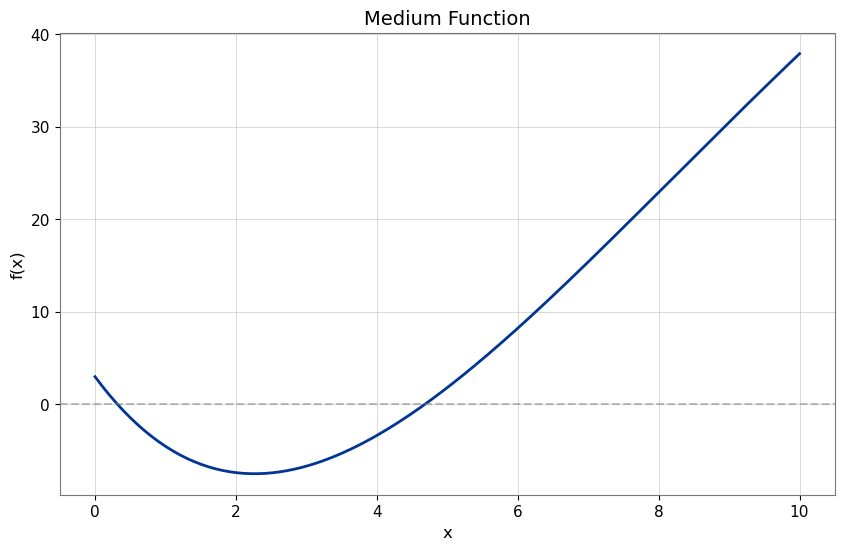

In [32]:
# Try with the medium function
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(0, 10, 200)
ax.plot(x, med_f(x), color=PITT_BLUE, linewidth=2)
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Medium Function')
plt.show()

In [33]:
# Find roots of medium function
print("Starting from x0=7.5:")
root1 = newton_raphson(med_f, 7.5)
print(f"Found root: {root1:.8f}")

print("\nStarting from x0=0.5:")
root2 = newton_raphson(med_f, 0.5)
print(f"Found root: {root2:.8f}")

Starting from x0=7.5:
5 steps
Found root: 4.67944947

Starting from x0=0.5:
4 steps
Found root: 0.32055053


## Using SciPy for Root Finding

Obviously, we shouldn't try to reinvent the wheel. SciPy provides many robust solvers.

In [34]:
from scipy.optimize import fsolve, brentq, newton

# Using scipy.optimize.newton (similar to our Newton-Raphson)
print("Using scipy.optimize.newton:")
root_scipy = newton(easy_f, 4)
print(f"Found root: {root_scipy:.8f}")

# Using fsolve (more general solver)
print("\nUsing scipy.optimize.fsolve:")
root_fsolve = fsolve(easy_f, 4)[0]
print(f"Found root: {root_fsolve:.8f}")

# Using brentq (bracketing method - needs interval containing root)
print("\nUsing scipy.optimize.brentq:")
root_brent = brentq(easy_f, 0, 1)  # Search between 0 and 1
print(f"Found root: {root_brent:.8f}")

Using scipy.optimize.newton:
Found root: 4.67944947

Using scipy.optimize.fsolve:
Found root: 4.67944947

Using scipy.optimize.brentq:
Found root: 0.32055053


## Summary

In this notebook we covered:

1. **Numerical Derivatives**
   - Forward difference: $O(\epsilon)$ accuracy
   - Centered difference: $O(\epsilon^2)$ accuracy  
   - Five-point stencil: $O(\epsilon^4)$ accuracy
   - Using Taylor expansion to derive formulas

2. **Root Finding**
   - Newton-Raphson method
   - Importance of starting point
   - SciPy alternatives

In the next notebook, we'll cover **Numerical Optimization**.

## Using the Shared Utils Module

Many of these functions are also available in our `utils.py` module:

In [35]:
# Numerical derivative (centered difference)
print(f"utils.numerical_derivative(med_f, 3): {utils.numerical_derivative(med_f, 3):.8f}")
print(f"Actual d_med_f(3): {d_med_f(3):.8f}")

# Five-point stencil
print(f"\nutils.numerical_derivative_high_order(med_f, 3): {utils.numerical_derivative_high_order(med_f, 3):.8f}")

# Newton-Raphson
root, iters, converged = utils.newton_raphson(easy_f, 4)
print(f"\nutils.newton_raphson(easy_f, 4): root={root:.8f}, iterations={iters}, converged={converged}")

utils.numerical_derivative(med_f, 3): 2.14837284
Actual d_med_f(3): 2.14837284

utils.numerical_derivative_high_order(med_f, 3): 2.14837284

utils.newton_raphson(easy_f, 4): root=4.67944947, iterations=4, converged=True
